In [1]:
import pandas as pd
import geopandas as gpd

import seaborn as sns


import matplotlib.pyplot as plt
import numpy as np

In [2]:




# Load the flights data
flights_data = pd.read_csv('../data/csv/2009.csv')
print(flights_data.columns)

# Load the airport data
airport_data = pd.read_csv('../data/us-airports.csv')
print(airport_data.columns)

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')
Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')


In [33]:
flights_data.head(1)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
airport_mean_delays = flights_data.groupby('ORIGIN')['DEP_DELAY'].mean().reset_index()


In [4]:
airport_mean_delays = airport_mean_delays.merge(airport_data[['iata_code', 'latitude_deg', 'longitude_deg']], left_on='ORIGIN', right_on='iata_code', how='left')


In [22]:
airlines_df = pd.read_csv('../data/airlines.csv')
airports_df = pd.read_csv('../data/airports.csv')
print(airlines_df.columns)

Index(['IATA_CODE', 'AIRLINE'], dtype='object')


In [20]:
abbr_companies = airlines_df.set_index('IATA_CODE')['AIRLINE'].to_dict()


In [7]:
identify_airport = airport_data.set_index('iata_code')['municipality'].to_dict()


In [23]:
identify_airport = airports_df.set_index('IATA_CODE')['CITY'].to_dict()

In [34]:
airport_mean_delays = pd.DataFrame(pd.Series(flights_data['ORIGIN'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)
abbr_companies = airlines_df.set_index('IATA_CODE')['AIRLINE'].to_dict()
identify_airport = airports_df.set_index('IATA_CODE')['CITY'].to_dict()


# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [37]:
for carrier in abbr_companies.keys():
    fg1 = flights_data[flights_data['OP_CARRIER'] == carrier]
    # print(fg1)
    try:
        test = fg1['DEP_DELAY'].groupby(flights_data['ORIGIN']).apply(get_stats).unstack()
        airport_mean_delays[carrier] = test.loc[:, 'mean'] 
    except:
        pass
    

/var/folders/wr/6zl8h6rj7zbd7kly_2lgsscw0000gn/T/ipykernel_65103/1110077360.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test = fg1['DEP_DELAY'].groupby(flights_data['ORIGIN']).apply(get_stats).unstack()
/var/folders/wr/6zl8h6rj7zbd7kly_2lgsscw0000gn/T/ipykernel_65103/1110077360.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, u

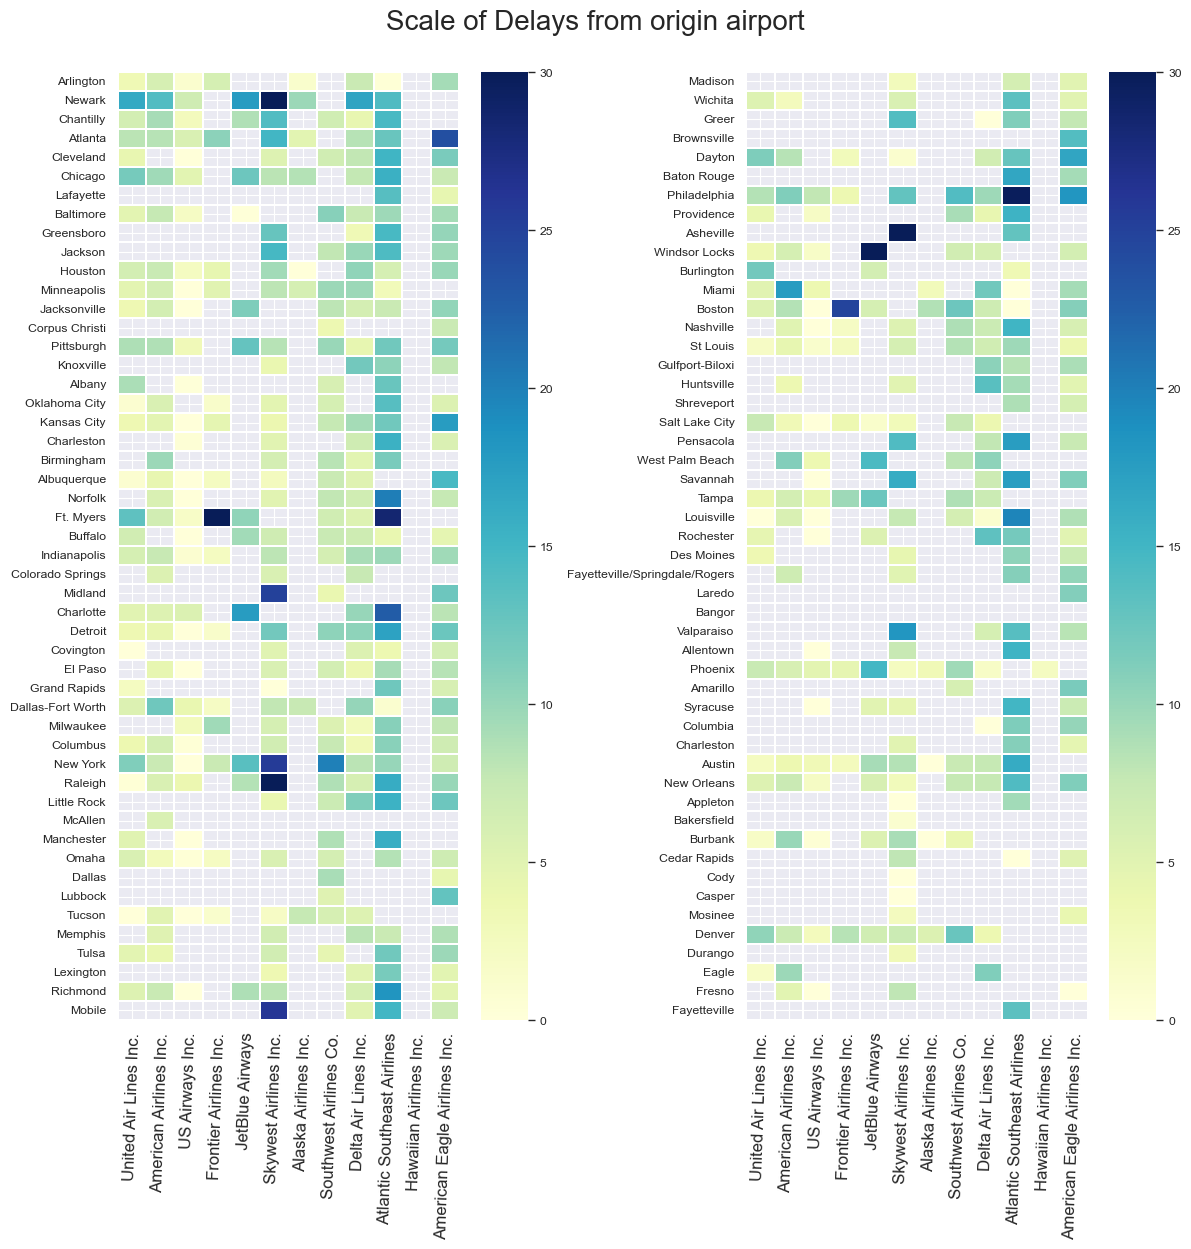

In [39]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(12,12))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Scale of Delays from origin airport", ha='center', fontsize = 20)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()
